In [1]:
import pandas as pd

In [30]:
# Load fx data
data = pd.read_csv('C:/Users/Shree/PycharmProjects/FxPrediction/EUR_USD Historical Data.csv')
del data['Open']
del data['High']
del data['Low']
del data['Price']
#data = data.tail(60)

In [31]:
data['Change %'] = data['Change %'].str.replace('%', '').astype('float')

In [32]:
data

,Date,Change %
0,"May 24, 2019",0.21
1,"May 23, 2019",0.24
2,"May 22, 2019",-0.06
3,"May 21, 2019",-0.10
4,"May 20, 2019",0.12
5,"May 17, 2019",-0.14
6,"May 16, 2019",-0.25
7,"May 15, 2019",-0.02
8,"May 14, 2019",-0.18
9,"May 13, 2019",-0.10


In [45]:
#divide into train and validation set
train = data[:int(0.95*(len(data)))]
valid = data[int(0.95*(len(data))):]

In [46]:
#preprocessing (since arima takes univariate series as input)
train.drop('Date',axis=1,inplace=True)
valid.drop('Date',axis=1,inplace=True)

C:\Users\Shree\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


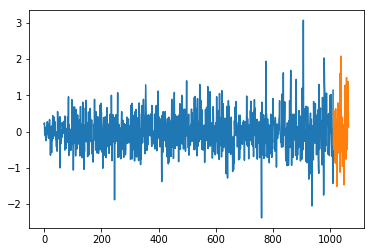

In [47]:
#plotting the data
import matplotlib.pyplot as plt
plt.plot(train['Change %'])
plt.plot(valid['Change %'])

In [48]:
#building the model
#from pyramid.arima import auto_arima
from pmdarima import auto_arima

In [49]:
#train

In [50]:
#building the model
from pmdarima import auto_arima

In [51]:
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=1459.612, BIC=1489.124, Fit time=2.880 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=1455.729, BIC=1465.567, Fit time=0.199 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=1457.535, BIC=1472.291, Fit time=0.130 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=1457.517, BIC=1472.273, Fit time=0.265 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=1456.074, BIC=1475.749, Fit time=1.530 seconds
Total fit time: 5.012 seconds


In [57]:
model_fit = model.fit(train)

In [58]:
print (model_fit.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 1011
Model:                        SARIMAX   Log Likelihood                -725.865
Date:                Sun, 26 May 2019   AIC                           1455.729
Time:                        14:13:40   BIC                           1465.567
Sample:                             0   HQIC                          1459.466
                               - 1011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0027      0.016      0.170      0.865      -0.028       0.033
sigma2         0.2461      0.007     34.064      0.000       0.232       0.260
Ljung-Box (Q):                       35.17   Jarque-

In [53]:
forecast = model.predict(n_periods=len(valid))

In [54]:
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

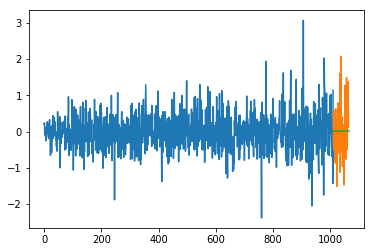

In [55]:
#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [56]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(valid,forecast))
print(rms)

0.7661195955365451
